# Exercício sobre regressão com DNNs

Explique o(s) motivo(s) do valor predito (i.e., da inferência feita) pela DNN do exemplo visto em sala de aula (predição para o valor $x=10$) não ser exatamente o valor que esperávamos ($\hat{y}=19$)?

### <font color='orange'> Porque não existe infinitos valores para que a máquina aprenda que realmente o valor são estes e que serão estes, é sempre uma predição, e devido a principalmente ser finitos valores, finita memória, finita capacidade de processamento, entre outros fatores, mas este é o principal.

<font color='black'>

O que pode ser feito para melhorar a precisão das inferências feitas pela DNN?

### <font color='orange'> Isto está explicado em cada um e justificado, assim também comentado em cada parte


<font color='black'>

Implemente todas as modificações que você achar necessarias e apresente os resultados.

**Descreva cada uma das mudanças feitas e as justifique.**

**Dicas**

+ Você pode querer alterar o otimizador ou definir outros valores para os parâmetros do otimizador atual, para isso, consulte a documentação sobre [otimizadores](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental)
+ Você pode querer também aumentar o conjunto de treinamento, para isso, lembre-se que a função original, ou seja, aquela que gerou os dados que estamos usando para o treinamento do modelo, é dada por $y = -1 + 2x$.
+ Pense sobre o número de épocas que usamos no exemplo. Você acha que 500 épocas é um valor pequeno ou grande para o treinamento de um modelo que resolva um problema tão simples quanto esse apresentado no exemplo?

### <font color='orange'> Depende e neste exemplo coloquei mais épocas de treinamento não muito mas o suficiente para que tivesse algo mais relevante ainda

<font color='black'>

Lembre-se que no exemplo, cada época de treinamento corresponde ao processo de (i) iniciar os pesos aleatóriamente (i.e., palpite inicial), (ii) calcular o erro, (iii) calcular o vetor gradiente do erro, (iv) atualiar os pesos dando um **passo** na direção apontada pelo gradiente. Reflita sobre o tamanho desse passo, ele pode interferir na precisão do modelo?

### <font color='orange'> Com certeza pois no caso do passo de aprendizado você ira saltar de um valor de peso para um outro valor de peso, para que isso ocorra, e o valor de precisão seja cada vez mais perto do alvo, é preciso que este passo seja pequeno, mas não muito para que consiga converter nem pouco, ou seja, grande o que irá fazer com que irá saltar e divergir. Portanto com certeza pode interferir na precisão.

---

### Nome: Hyago Vieira Lemes Barbosa Silva
### Matrícula: 922

### Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Definindo o dataset

### <font color='orange'> Primeira mudança foi feita na função original, com x e y e uma vasta gama de valores ao invés destes 6 valores apenas sendo de -20 a 20 com 1000 valores entre estes, inclusive eles. Criando realmente uma função linear com um array de vetores através do linspace do numpy, atribuindo para estas novas variáveis:

- x_novo
- y_novo

In [2]:
# função original, com x e y e uma vasta gama de valores ao invés destes 6 valores
# gama de valores sendo de -20 a 20 com 1000 valores
x_novo = np.linspace(-20.0,20.0,1000)
y_novo = -1 + 2*x_novo

x = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])


# printando apenas 10 valores de x novo e y novo
print('10 valores de x\n',x_novo[:10])
print('10 valores de y\n',y_novo[:10])

10 valores de x
 [-20.         -19.95995996 -19.91991992 -19.87987988 -19.83983984
 -19.7997998  -19.75975976 -19.71971972 -19.67967968 -19.63963964]
10 valores de y
 [-41.         -40.91991992 -40.83983984 -40.75975976 -40.67967968
 -40.5995996  -40.51951952 -40.43943944 -40.35935936 -40.27927928]


### Definindo a rede neural densa

Define uma rede neural densa com um neurônio e entrada com uma dimensão.

Para mais informações sobre as classes e funções do TF, acesse: https://www.tensorflow.org/api_docs

### <font color='orange'> Segundo passo foi nomear cada um destes modelos para modelo_1 e modelo_2, sendo o modelo_2 o que eu estou atribuindo as modificações feitas e as análises comparativas para o modelo_1


#### _**OBS: Mantendo 1 neurónio e 1 entrada com a prórpia função linear da rede neural e comparar com a outra**_

In [3]:
# renomeando e comparando os modelos
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])],name='model_1')

#novo modelo aqui apenas colocarei outro nome mas mantendo 1 neurónio e 1 entrada com a prórpia função linear da rede neural e comparar com a outra
novo_modelo = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])], name='model_2')

### Imprimindo um resumo da arquitetura do modelo

+ O método `summary` imprime uma descrição da arquitetura do modelo, mostrando a disposição das camadas e o número total de parâmetros treináveis e não treináveis.
    + Parâmetros não treináveis são aqueles que não são atualizados durante o treinamento do modelo.

+ Ele exibe as seguintes informações:
    + O nome de cada camada (que é gerado automaticamente, a menos o definamos ao criar a camada),
    + Seu formato de saída (`None` significa que o tamanho do mini-batch pode ser qualquer um) e
    + Seu número de parâmetros.

### <font color='orange'> Aqui coloco apenas o summary de ambas redes demonstrando que são idênticas

In [4]:
model.summary()
print('\n\n')
#printando o novo modelo também que é idêntico ao anterior
novo_modelo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Inspecionando os pesos iniciais do modelo

A inicialização dos pesos é crucial para o bom treinamento de um modelo, pois ela

- Acelera a convergência (i.e., o aprendizado do modelo),
- Evita problemas de explosão e desaparecimento do gradiente.
    + Explosão: os gradientes se tornam tão grandes e, consequentemente, os pesos também, levando a divergência do modelo.
    + Desaparecimento: os gradientes se tornam extremamente pequenos e, consequentemente, as atualizações dos pesos também, resultando em treinamento (i.e., aprendizado) lento ou mesmo estagnação.

Por padrão, os pesos do modelo são inicializados pela classe `Dense` da seguinte forma:

- O parâmetro `kernel_initializer` define como os pesos sinápticos ($w$) são inicializados => Por padrão, usa-se a inicialização `glorot_uniform` (também chamadade **Xavier**)

- Incializa-se os pesos usando amostras retiradas de uma distribuição uniforme com limites: `[-limit, limit]`, onde
    
- $$\text{limit} = \sqrt{\frac{6}{(\text{fan}_{\text{in}} + \text{fan}_{\text{out}})}}$$
    
- $\text{fan}_{\text{in}}$  é igual ao número de neurônios da camada anterior e $\text{fan}_{\text{out}}$ é igual ao número de neurônios nessa camada sendo configurada.

+ O parâmetro `bias_initializer` define como os pesos de bias ($b$) são inicializados => Por padrão, todos os valores inciais dos pesos de bias são zerados (`zeros`).


Existem outras formas de se inicializar os pesos, para mais informações, acesse: [Initializers](https://keras.io/api/layers/initializers/)

### <font color='orange'> Mantive a mesma configuração, não alterei nada sobre as inicializações dos pesos também como os valores de limites que iniciarão pois o foco aqui realmente foi outro

In [5]:
# Retorna uma lista com todos os pesos.
model.get_weights()


[array([[-1.2539977]], dtype=float32), array([0.], dtype=float32)]

In [6]:
# lista com todos pesos do novo modelo

novo_modelo.get_weights()

[array([[0.06624842]], dtype=float32), array([0.], dtype=float32)]

#### Acessando o peso sináptico e o de bias do modelo

In [7]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  -1.2539977
b  =  0.0


In [8]:
#Printando o novo modelo e valores do peso que possui
print("w = ", novo_modelo.get_weights()[0][0][0])
print("b  = ", novo_modelo.get_weights()[1][0])

w =  0.06624842
b  =  0.0


### Compilando o modelo

Usamos como **otimizador** o gradiente descendente estocástico e como **função de erro** o erro quadrático médio.

### <font color='orange'> Aqui realmente foi uma modificação que foi de grande eficiência, pois eu consegui algo muito bom, foi alterando o otmizador SGD sobre os valores que são atribuidos por padrão, estes foram:


<font size=5px>

    - learning_rate de 0,01 de padrão para um valor de 0,02 o dobro;
    
    -  momentum valor de 0,01 ao inves de 0,0 mesmo, padrão,
### Caso momentum 0,0
$$w = w - learning_\text{rate} * g$$

### Caso momentum diferente de 0,0
$$velocity = momentum * velocity - learning_\text{rate} * g$$

$$w = w + velocity$$

    -  True para o use_ema, para utilização de uma média móvel exponencial,
     que causará um decaimento interessante e rápido para o loss, ele fará a
     substituição do peso pelo valor da média móvel a cada atualização de pesos;

    - E o ema momentum valor a ser calculado e substituido de 0,99 (padrão) para 0,77, através de testes.

### <font color='orange'>Adicionei também as métricas loss, accuracy, mae, mse

In [9]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [10]:
#aqui compulando o modelo usaremos por enquanto MSE ou EQM, com o estocástico
sgd_modificate = tf.keras.optimizers.experimental.SGD(
    #alterando o passo de aprendizado
    learning_rate=0.02,
    #acelera a descida do gradiente
    momentum=0.01,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    #usando media móvel exponencial
    use_ema=True,
    #alterando o valore do momento de decaimento
    ema_momentum=0.77,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD',
)
novo_modelo.compile(optimizer=sgd_modificate, loss='mean_squared_error',metrics=['mae', 'mse'])

### Fazendo uma predição com o modelo inicial.

In [11]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 154ms/step
[[-12.539977]]


In [12]:
print(novo_modelo.predict([10.0]))

1/1 [==============================] - 0s 57ms/step
[[0.66248417]]


### Treinando o modelo

In [13]:
# Ajusta o modelo aos dados (também conhecido como treinar o modelo)
history = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 445ms/step - loss: 45.9453
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 36.5260
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 29.1076
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 23.2635
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 18.6583
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 15.0277
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 12.1643
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 9.9044
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 8.1196
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 6.7087
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 5.5921
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 4.7071
Epoch 13/500
1/1 [==============================] 

### <font color='orange'> Aqui salvamos como modelo_1.keras o modelo padrão

In [14]:
model.save('modelo_1.keras')

### <font color='orange'> Aqui colocamos no modelo 1000 épocas para treinamento, onde com aproximadamente 700 épocas converge para um valore de loss e salvá-os o modelo posteriormente como modelo_2.keras. Atualizei para 700 epocas para analisar o resultado

In [15]:
# treinar o novo modelo e aumentando as épocas em dobro
history_novo_modelo = novo_modelo.fit(x, y, epochs=700)

Epoch 1/700
1/1 [==============================] - 0s 377ms/step - loss: 14.5190 - mae: 3.2119 - mse: 14.5190
Epoch 2/700
1/1 [==============================] - 0s 11ms/step - loss: 9.1414 - mae: 2.5639 - mse: 9.1414
Epoch 3/700
1/1 [==============================] - 0s 14ms/step - loss: 5.8654 - mae: 2.0542 - mse: 5.8654
Epoch 4/700
1/1 [==============================] - 0s 10ms/step - loss: 3.8996 - mae: 1.6754 - mse: 3.8996
Epoch 5/700
1/1 [==============================] - 0s 11ms/step - loss: 2.7140 - mae: 1.4308 - mse: 2.7140
Epoch 6/700
1/1 [==============================] - 0s 11ms/step - loss: 1.9928 - mae: 1.2393 - mse: 1.9928
Epoch 7/700
1/1 [==============================] - 0s 13ms/step - loss: 1.5485 - mae: 1.0888 - mse: 1.5485
Epoch 8/700
1/1 [==============================] - 0s 11ms/step - loss: 1.2693 - mae: 0.9700 - mse: 1.2693
Epoch 9/700
1/1 [==============================] - 0s 11ms/step - loss: 1.0890 - mae: 0.8811 - mse: 1.0890
Epoch 10/700
1/1 [================

### <font color='orange'> Veja o valor de loss é muito inferior ao modelo 1, ou seja, é muito próximo ao valor real

### Salvando o modelo treinado

In [16]:
novo_modelo.save('modelo_2.keras')

### Testando o modelo

Prevendo a saída de um novo dado (inédito) de entrada (também conhecido como **inferência**).

### <font color='orange'> Aqui vamos testar 2 valores de predict para analisar a resposta y para um valor x conhecido, sabendo que era aquele que foi comumente usado anteiormente, assim 10 para x retornaria um valor 19 e -1 para x retornaria -3

In [17]:
print('fist predict',model.predict([10.0]))
print('second predict',model.predict([-1.0]))

1/1 [==============================] - 0s 47ms/step
fist predict [[18.976946]]
1/1 [==============================] - 0s 37ms/step
second predict [[-2.9863005]]


In [18]:
#testando o novo modelo
print('fist predict',novo_modelo.predict([10.0]))
print('second predict',novo_modelo.predict([-1.0]))

1/1 [==============================] - 0s 41ms/step
fist predict [[18.99999]]
1/1 [==============================] - 0s 36ms/step
second predict [[-2.9999967]]


### <font color='orange'> Veja que praticamente temos 5 casas decimais de 9, assim muito próximo ao valor real

### Inspecionando os pesos do modelo treinado

In [19]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  1.9966588
b  =  -0.98964167


### <font color='orange'>Vamos analisar o valor dos pesos w e b agora sobre o novo modelo, basicamente o valor do coeficiente angular e linear respectivamente do neurônio que possuímos apenas neste modelo

### Valores reais:
    
  <font size=5px>
    
    - W = 2
    - b = -1

In [20]:
# analisando sobre o novo modelo e os pesos sobre a função linear
print("w = ", novo_modelo.get_weights()[0][0][0])
print("b  = ", novo_modelo.get_weights()[1][0])

w =  1.9999988
b  =  -0.99999785


#### Podemos inspecionar o modelo de forma visual usando a aplicação web chamada de [Netron](https://netron.app)

### Plotando o histórico de erros ao longo das épocas de treinamento

O objeto da classe `History` possui um atributo chamado de `history`, que é um dicionário com os valores do erro ao longo das épocas de treinamento.

Esse dicionário pode conter outras medidas feitas longo do treinamento e teste do modelo, para isso, basta especificar o que se quer medir através do parâmetro `metrics` do método `compile()`.

In [21]:
type(history.history)

dict

In [22]:
history.history.keys()

dict_keys(['loss'])

In [23]:
history_novo_modelo.history.keys()

dict_keys(['loss', 'mae', 'mse'])

### <font color='orange'> Abaixo possui a comparação gráfica do loss do modelo 1 e do modelo 2, veja que é desde a primeira época a época 200. Depois mostro com zoom, os valores, junto a isto o print do valor mínimo alcançado de loss(erro).

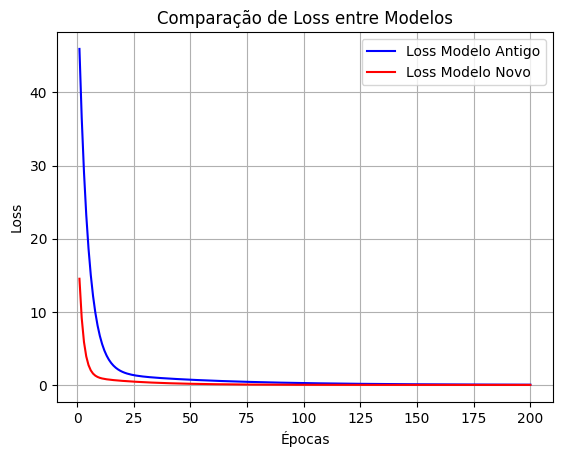


Valor mínimo alcançado de loss no Modelo Antigo:

6.24276144662872e-05

Valor mínimo alcançado de loss no Modelo Novo:

2.6076918402395677e-12

Proposção do valor mínimo alcançado do antigo
4.1771447820544226e-08  x  6.24276144662872e-05  =  2.6076918402395677e-12


In [34]:
# Loss do modelo antigo
loss_antigo = history.history['loss']

# Loss do modelo novo
loss_novo = history_novo_modelo.history['loss']

# Épocas (supondo que ambas as histórias tenham o mesmo número de épocas)
epocas = range(1, len(loss_antigo) + 1)

# Plotar as curvas de loss dos dois modelos no mesmo gráfico
plt.plot(epocas[:200], loss_antigo[:200], 'b', label='Loss Modelo Antigo')
plt.plot(epocas[:200], loss_novo[:200], 'r', label='Loss Modelo Novo')

plt.title('Comparação de Loss entre Modelos')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

print('\nValor mínimo alcançado de loss no Modelo Antigo:\n')
print(np.min(loss_antigo))

print('\nValor mínimo alcançado de loss no Modelo Novo:\n')
print(np.min(loss_novo))

print('\nProposção do valor mínimo alcançado do antigo')
print(np.min(loss_novo)/np.min(loss_antigo),' x ', np.min(loss_antigo), ' = ', np.min(loss_novo))


### <font color='orange'> Abaixo o gráfico de comparação novamente porém com ZOOM, de 300 épocas a 500 épocas, nesta faixa veja a variação que ainda possui no modelo antigo para o modelo novo, e lembre-se que ainda possui mais 200 épocas de treinamento que foram executadas no modelo mais novo, as épocas com o passo de aprendizado possui muitas características que podem auxiliar na convergência, e não apenas estes, existem outros, mas estes são os mais específicos. O valor de loss chega a ser milhoes de vezes menor


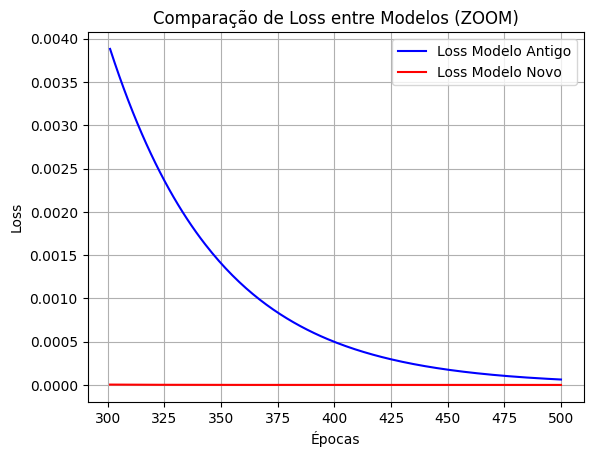

In [32]:
# Plotar as curvas de loss dos dois modelos no mesmo gráfico
plt.plot(epocas[300:500], loss_antigo[300:500], 'b', label='Loss Modelo Antigo')
plt.plot(epocas[300:500], loss_novo[300:500], 'r', label='Loss Modelo Novo ')

plt.title('Comparação de Loss entre Modelos (ZOOM)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### <font color='orange'> Mesmo treinando 2x o modelo 1 não chega ainda no valor de loss que chegou este modelo, existem outras alternativas, e ainda poderiamos dar o chute inicial, mas não escolhi fazer isto. Agradeço!